## Problem Statement:
AllLife Bank aims to increase its loan customer base by converting existing liability (deposit) customers into personal loan customers. Despite a 9% success rate from a past marketing campaign, the bank believes targeted marketing can improve this conversion rate. As a Data Scientist, my task is to build a predictive model that identifies liability customers who are most likely to buy a personal loan. The model should also provide insights into the key factors influencing loan purchase decisions, helping the marketing team focus their efforts on high-potential customer segments.

## Data Dictionary
ID: Customer ID
Age: Customer’s age in completed years
Experience: # years of professional experience
Income: Annual income of the customer (in thousand dollars)
ZIP Code: Home Address ZIP code.
Family: The family size of the customer
CCAvg: Average spending on credit cards per month (in thousand dollars)
Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
Mortgage: Value of house mortgage if any. (in thousand dollars)
Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
Securities_Account: Does the customer have a securities account with the bank?
CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
Online: Do customers use Internet banking facilities?
CreditCard: Does the customer use a credit card issued by any other Bank (excluding All Life Bank)?

## Importing the Necessary Libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To get diferent metric scores
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset
loandata = pd.read_csv('/content/drive/My Drive/Loan_Modelling.csv')


In [ ]:
# copying data to another variable to avoid any changes to original data
data = loandata.copy()

## Overview of the Dataset
### Viewing first five, last five and some samples of dataset

In [ ]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
data.sample(20)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
3883,3884,40,16,98,94534,2,1.8,2,98,0,0,0,1,0
4392,4393,52,27,81,92634,4,3.8,2,0,0,0,0,0,0
4448,4449,59,34,40,94102,3,0.9,3,0,0,0,0,1,0
3577,3578,39,9,32,91016,3,2.0,3,0,0,0,0,1,0
4858,4859,50,24,62,94550,2,0.8,3,0,0,0,0,1,0
4687,4688,58,34,48,93460,4,1.3,2,0,0,0,0,1,1
10,11,65,39,105,94710,4,2.4,3,0,0,0,0,0,0
4567,4568,46,20,19,94105,3,0.5,2,97,0,1,0,1,0
1240,1241,52,27,15,91320,4,0.8,1,101,0,0,0,0,0
2890,2891,48,24,18,94304,4,0.2,1,0,0,0,0,1,1


The dataset contains ID column as uniqueid column.

In [ ]:
# Understanding the shape of dataset
data.shape

(5000, 14)

The dataset contains 5000 rows and 14 columns.

In [ ]:
# Checking the datatypes of the columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


All the coulmns are numeric in nature. CCAvg column is of float type while rest all are integer type.

In [ ]:
# Checking the statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


It is observed that the Experience column contains negative values which is not possible. So we will remove the negative signs from the education column, may be they have been placed mistakenly.

Minimum income value is observed as eight thosand dollars and maximum income value is observed as two hundred and twenty four thousand dollars.

## Checking for missing values

In [ ]:
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


It is observed that there are no null values in the dataset.

## Checking for duplicate values

In [ ]:
data.duplicated().sum()

np.int64(0)

It is observed that there are no duplicate values in the dataset.

## Dropping the columns with all unique values

In [ ]:
data.ID.nunique()

5000

The ID column contains all unique values, so we can drop it as it is of no use in our analysis.

In [ ]:
data = data.drop('ID', axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


So, ID column is now removed.

As Experience column contains negative values, we will remove the negative signs.

In [ ]:
# Removing negative signs in experience column
data['Experience'] = data["Experience"].abs()

Columns like Education, ZIPCode, Securities_Account, CD_Account, Online, CreditCard are numerical types. We will convert them to categorical types for better analysis.

In [ ]:
# Converting numerical columns to categorical
columns_to_convert = ["Education", "ZIPCode", "Securities_Account", "CD_Account", "Online", "CreditCard"]

for i in columns_to_convert:
  data[i] = data[i].astype(object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   object 
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   object 
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   object 
 10  CD_Account          5000 non-null   object 
 11  Online              5000 non-null   object 
 12  CreditCard          5000 non-null   object 
dtypes: float64(1), int64(6), object(6)
memory usage: 507.9+ KB


So, the required columns have been converted to categorical.

As Education is a categorical column, but is populated with numerical values, let us encode them. It will be helpful in exploratory data analysis.

In [ ]:
# Encoding Education column
education_map = {
    1: 'Undergraduate',
    2: 'Graduate',
    3: 'Professional'
}

data['Education'] = data['Education'].map(education_map)


In [ ]:
data["Education"].head()

,Education
0,Undergraduate
1,Undergraduate
2,Undergraduate
3,Graduate
4,Graduate


So we can see that Education column is now encoded.

In [ ]:
data.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,5000.0,NaN,NaN,NaN,45.3384,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,NaN,NaN,NaN,20.1346,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,NaN,NaN,NaN,73.7742,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,467.0,94720.0,169.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family,5000.0,NaN,NaN,NaN,2.3964,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,NaN,NaN,NaN,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000,3,Undergraduate,2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mortgage,5000.0,NaN,NaN,NaN,56.4988,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,NaN,NaN,NaN,0.096,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,2.0,0.0,4478.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

## Univariate Analysis

In [ ]:
# function to create histogram and box plots

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="lightyellow"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="skblue"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2,color="skyblue"
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="orange", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="purple", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Accent",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

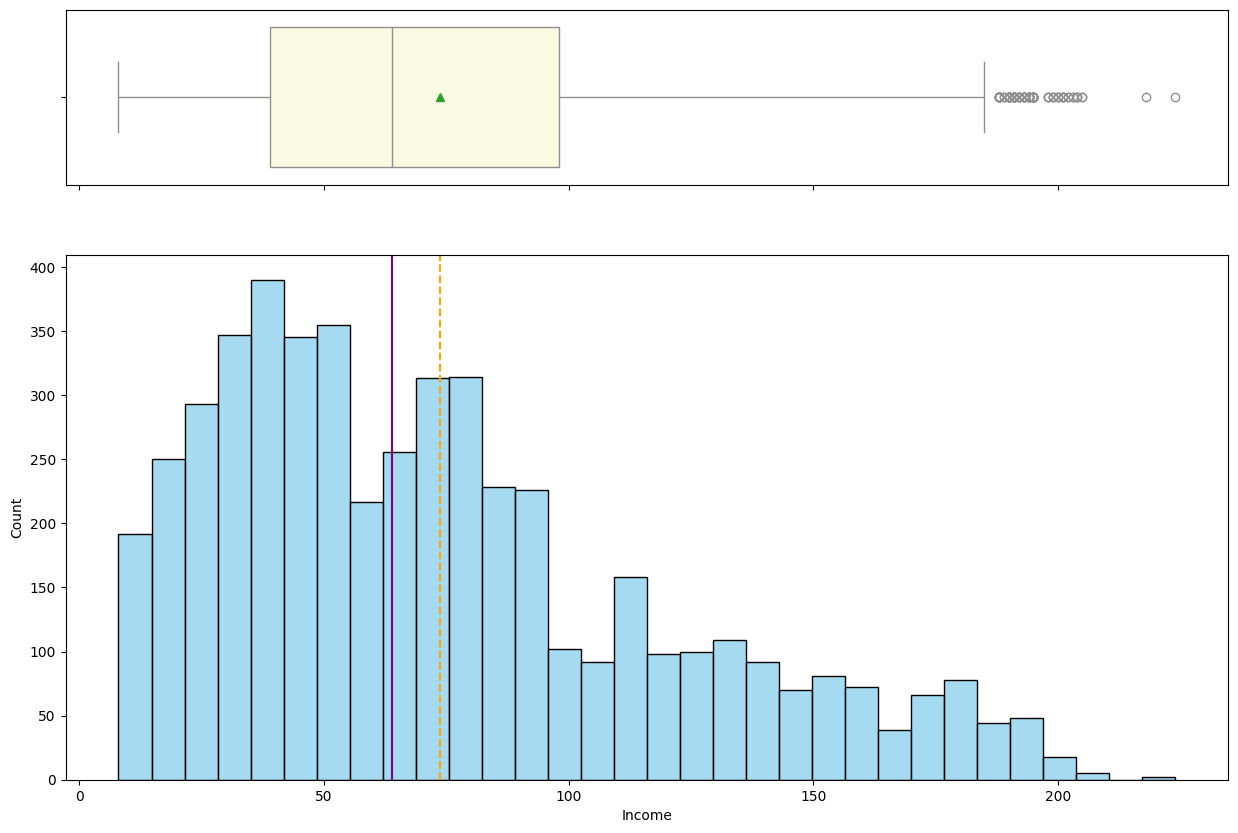

In [ ]:
# Plotting histogram and boxplot for numerical values
histogram_boxplot(data, 'Income')

It is observed that Income values are slightly right skewed.
There are outliers on higher income side.
Average income value is nearly 75 thousand dollars.

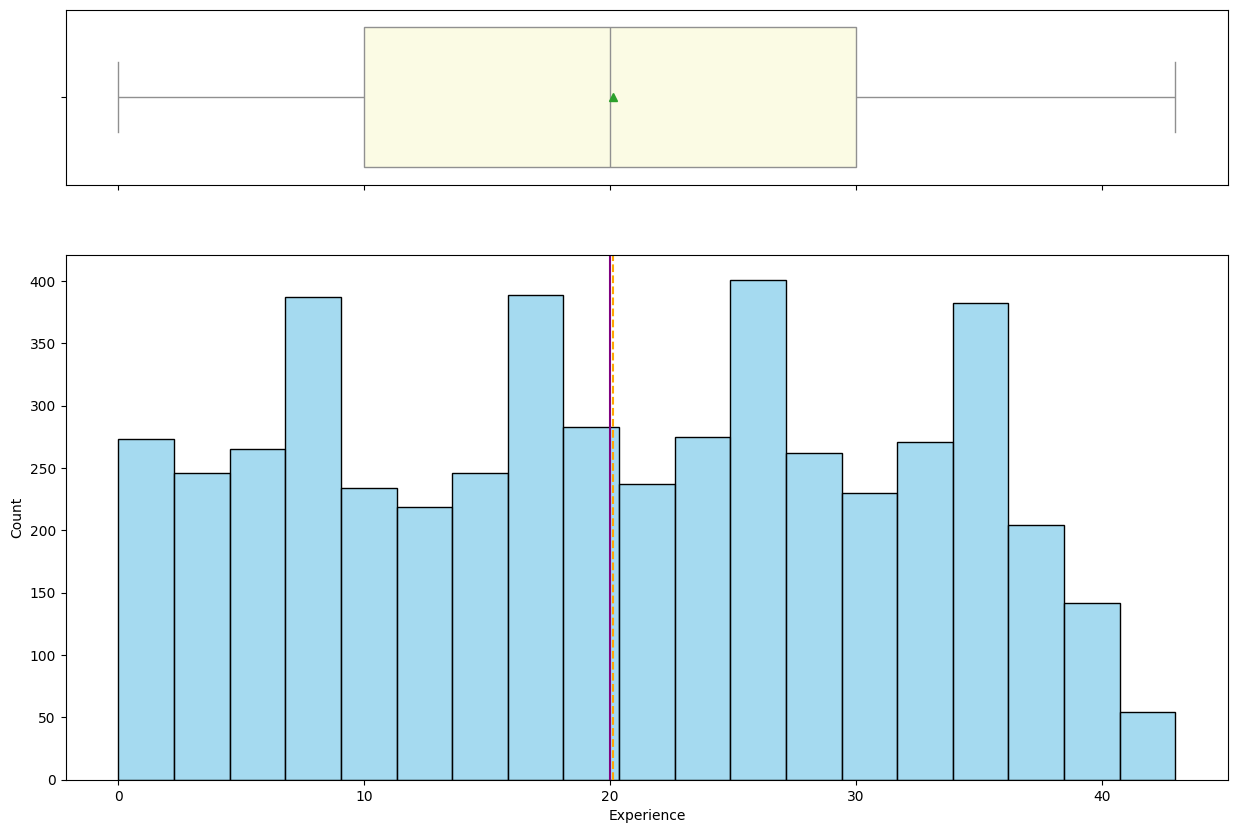

In [ ]:
# Plotting histogram and boxplot for numerical values
histogram_boxplot(data, 'Experience')

It is observed that Experience values are uniformly distributed with nearly same mean and median values.
There are no outliers for Experience values.
Average Experince is observed to be nearly 20 years.

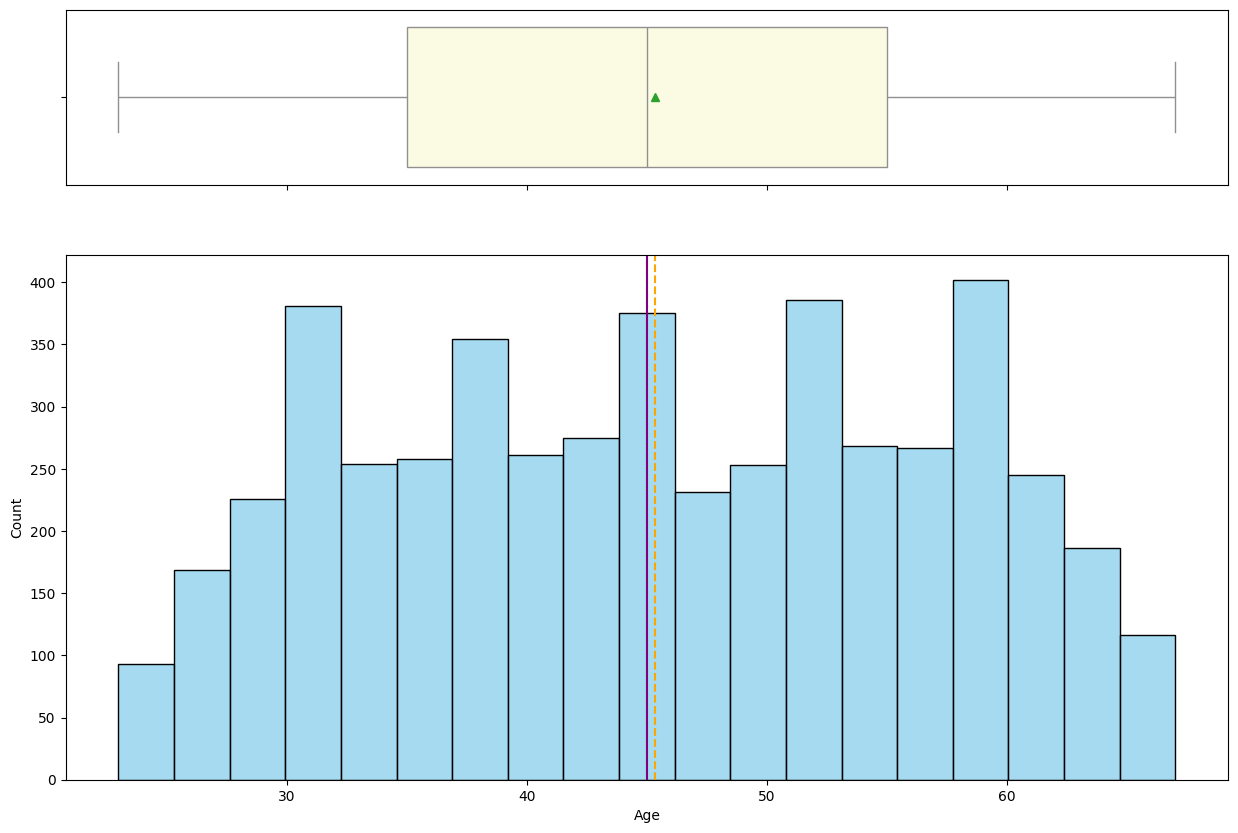

In [ ]:
# Plotting histogram and boxplot for numerical values
histogram_boxplot(data, 'Age')

It is observed that Age values are nearly uniformly distributed with nearly similar mean and median and no outliers.
Average Age value is observed as 45 years.

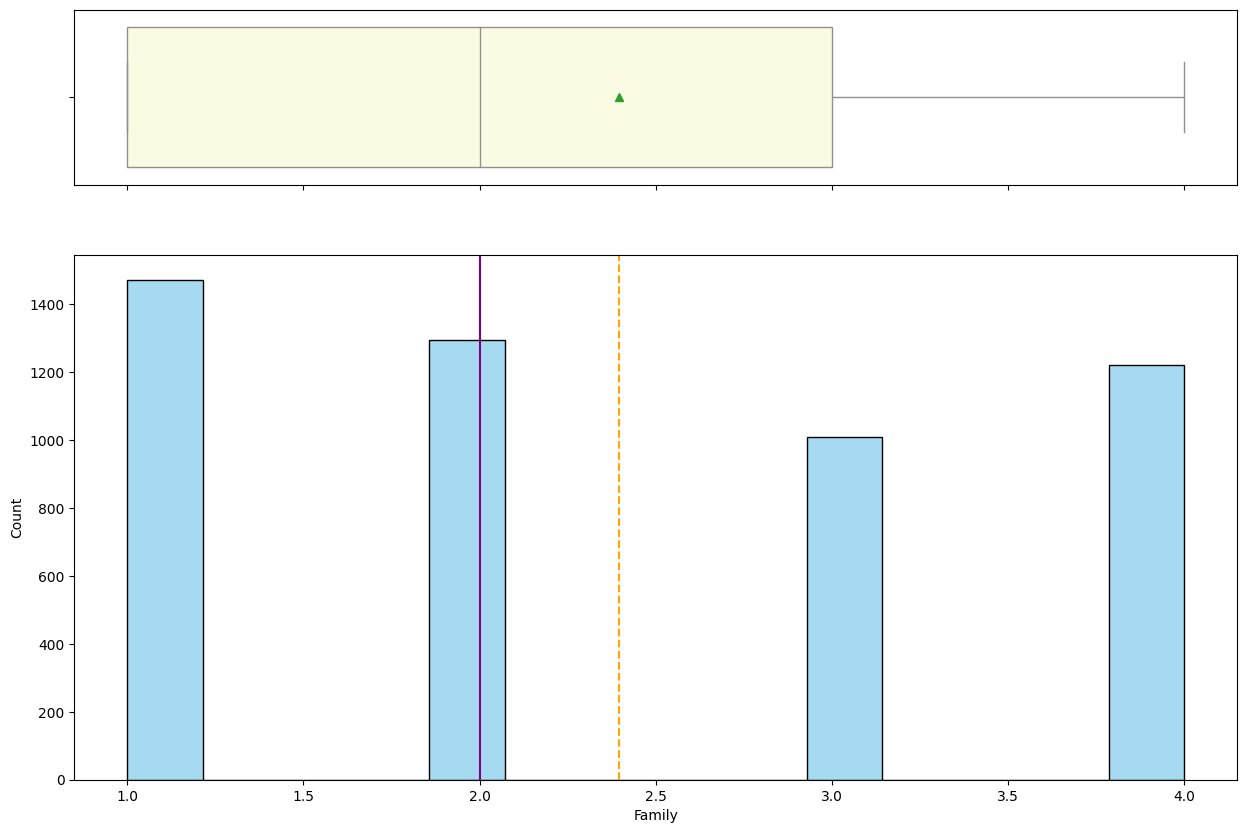

In [ ]:
# Plotting histogram and boxplot for numerical values
histogram_boxplot(data, 'Family')

It is observed that maximum customers are having family size of one.

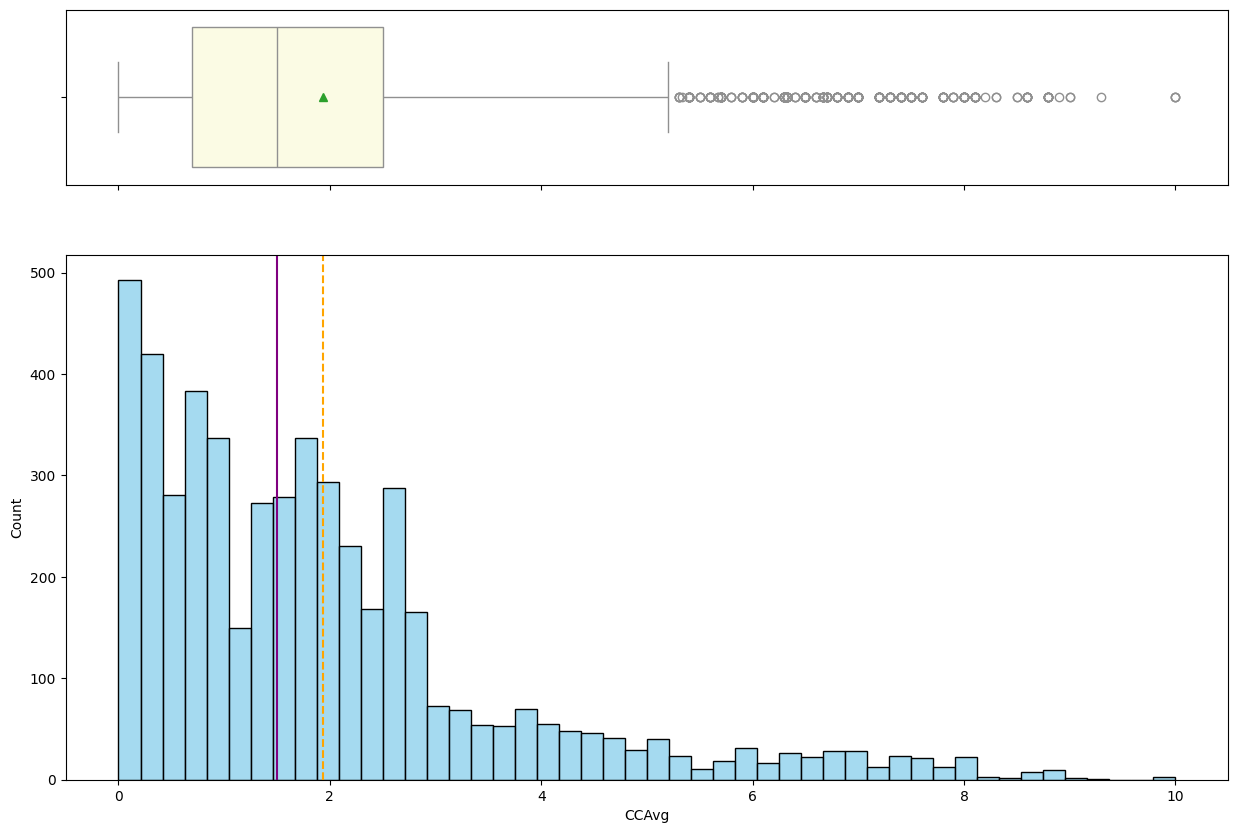

In [ ]:
# Plotting histogram and boxplot for numerical values
histogram_boxplot(data, 'CCAvg')

It is observed that average spending on credit card per month values are rightly skewed having multiple outliers.


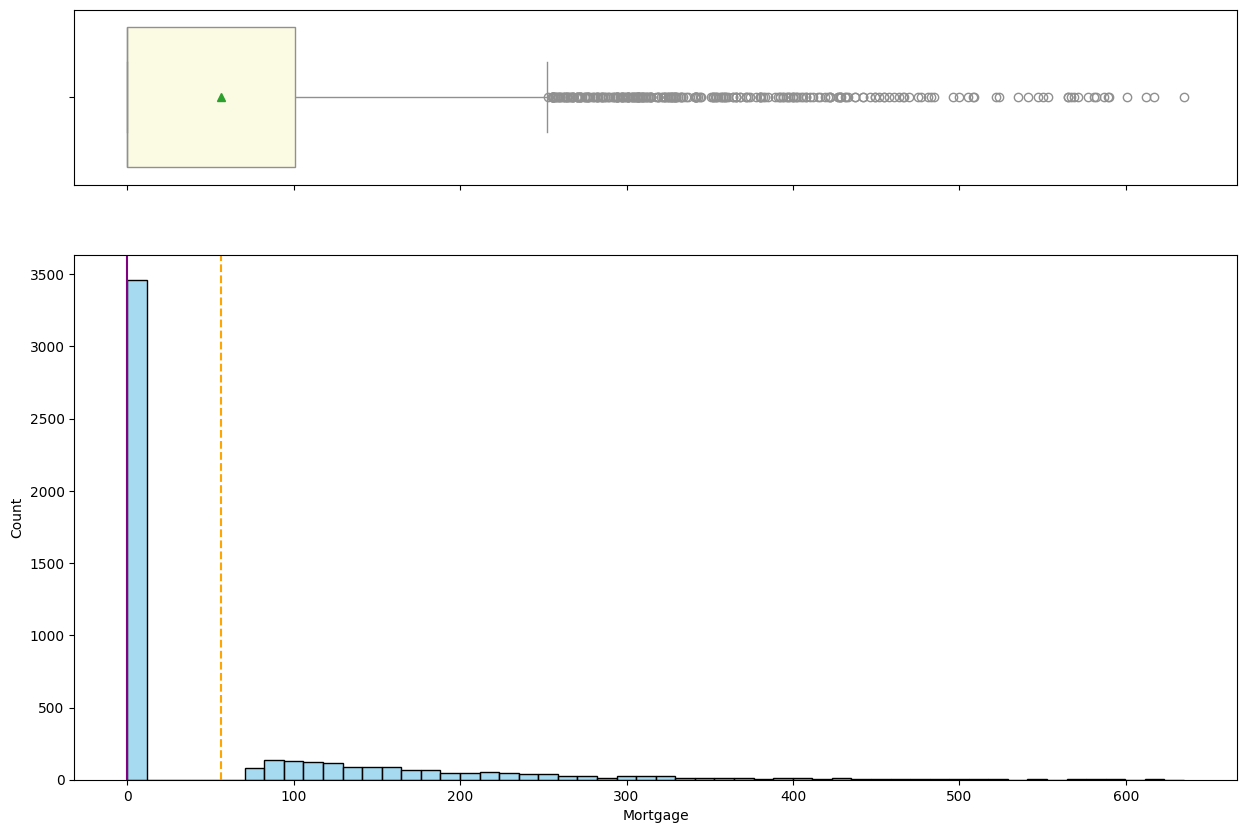

In [ ]:
# Plotting histogram and boxplot for numerical values
histogram_boxplot(data, 'Mortgage')

It is observed that maxmimum number of custumers doesnot have house mortgage value.

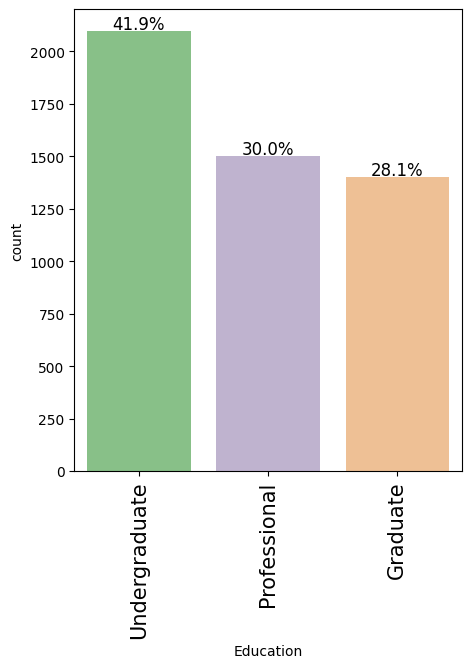

In [ ]:
# Plotting countplot for categorical values
labeled_barplot(data, "Education", perc=True)

It is observed that nearly 42 percentage of customers are undergraduate.

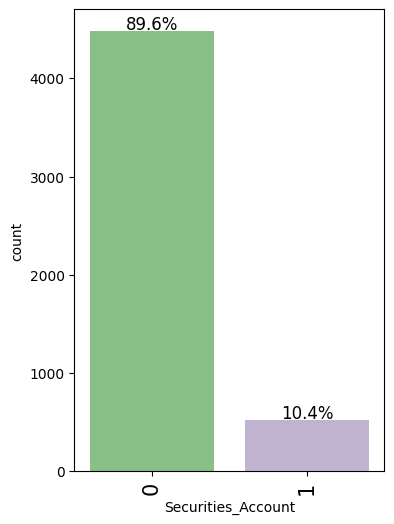

In [ ]:
# Plotting countplot for categorical values
labeled_barplot(data, "Securities_Account", perc=True)

Only 10 % customers are having security account with the bank.

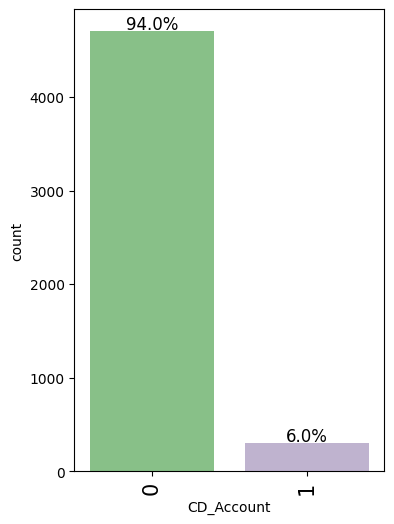

In [ ]:
# Plotting countplot for categorical values
labeled_barplot(data, "CD_Account", perc=True)

Only 6 % of customers are having CD Account with the bank.

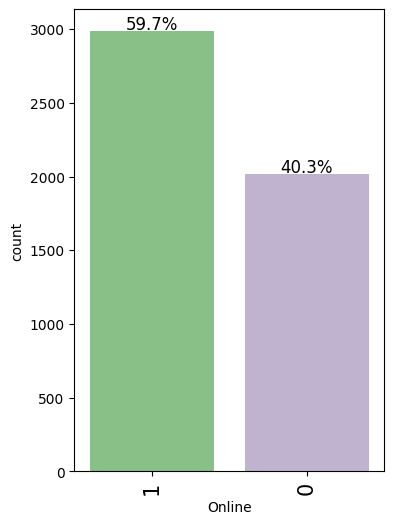

In [ ]:
# Plotting countplot for categorical values
labeled_barplot(data, "Online", perc=True)

It is observed that nearly 60 % of customers are using internet banking facility.

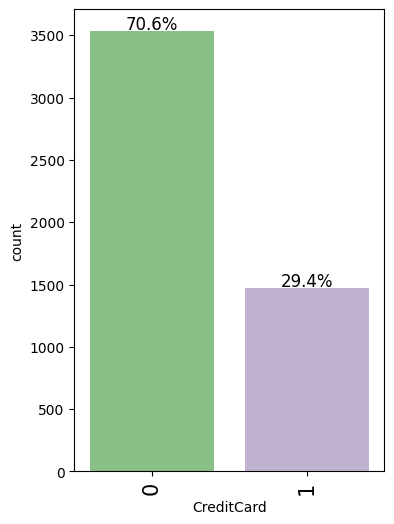

In [ ]:
# Plotting countplot for categorical values
labeled_barplot(data, "CreditCard", perc=True)

Nearly 29 % of customers are using credit card issued by other banks(excluding All Life Bank).

## Bivariate Analysis

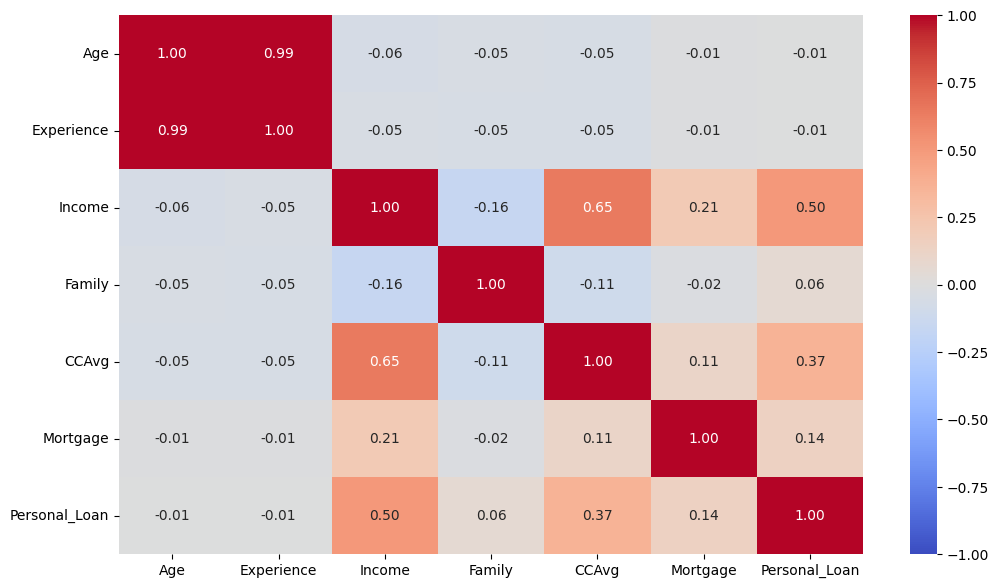

In [ ]:
# Including only numerical columns

cols_list = [col for col in data.columns if col not in ['ID', 'ZIPCode','Securities_Account','CD_Account','Online','CreditCard','Education']]

# plotting the heatmap

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm"
)
plt.show()

It is observed that there is a high positive correlation between Experience and Age and also between Income and Average Spendings on Credit Card per month.

In [ ]:
# Function to plot stacked bar plot
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

## Let us check distribution of Personal Loan for different categories of Education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
Professional   1296  205  1501
Graduate       1221  182  1403
Undergraduate  2003   93  2096
------------------------------------------------------------------------------------------------------------------------


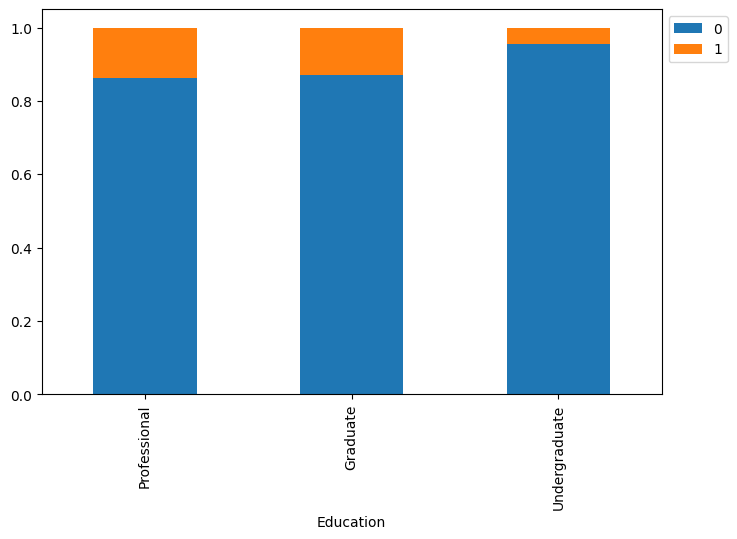

In [ ]:
stacked_barplot(data, "Education", "Personal_Loan")

It is observed that customers falling in Professional Education Category are opting more for the personal loan compared to Graduates and Undergraduates.

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="seagreen",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="purple",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="viridis")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="viridis",
    )

    plt.tight_layout()
    plt.show()

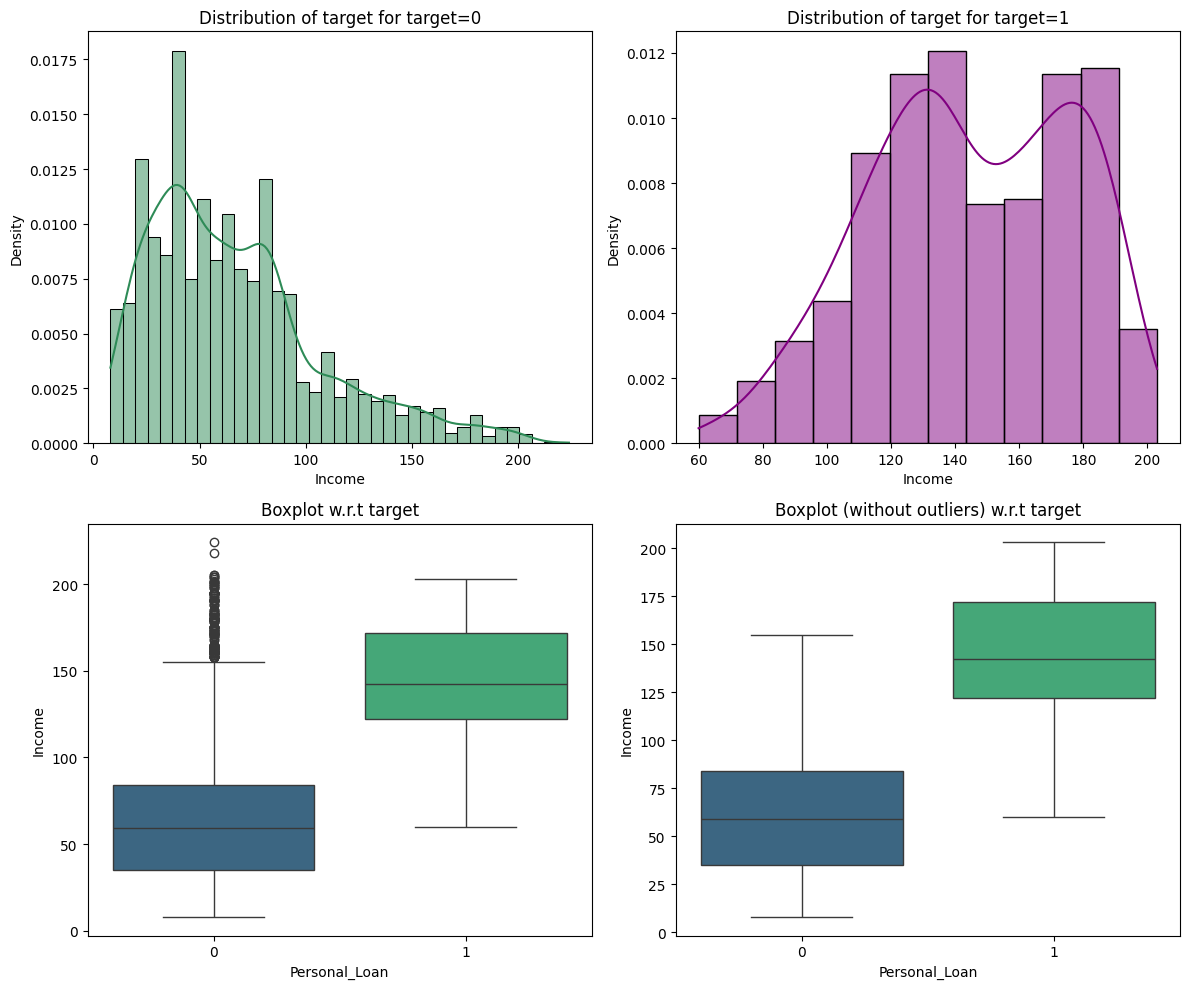

In [ ]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

It is observed that customers with higher income are buying the personal loan.

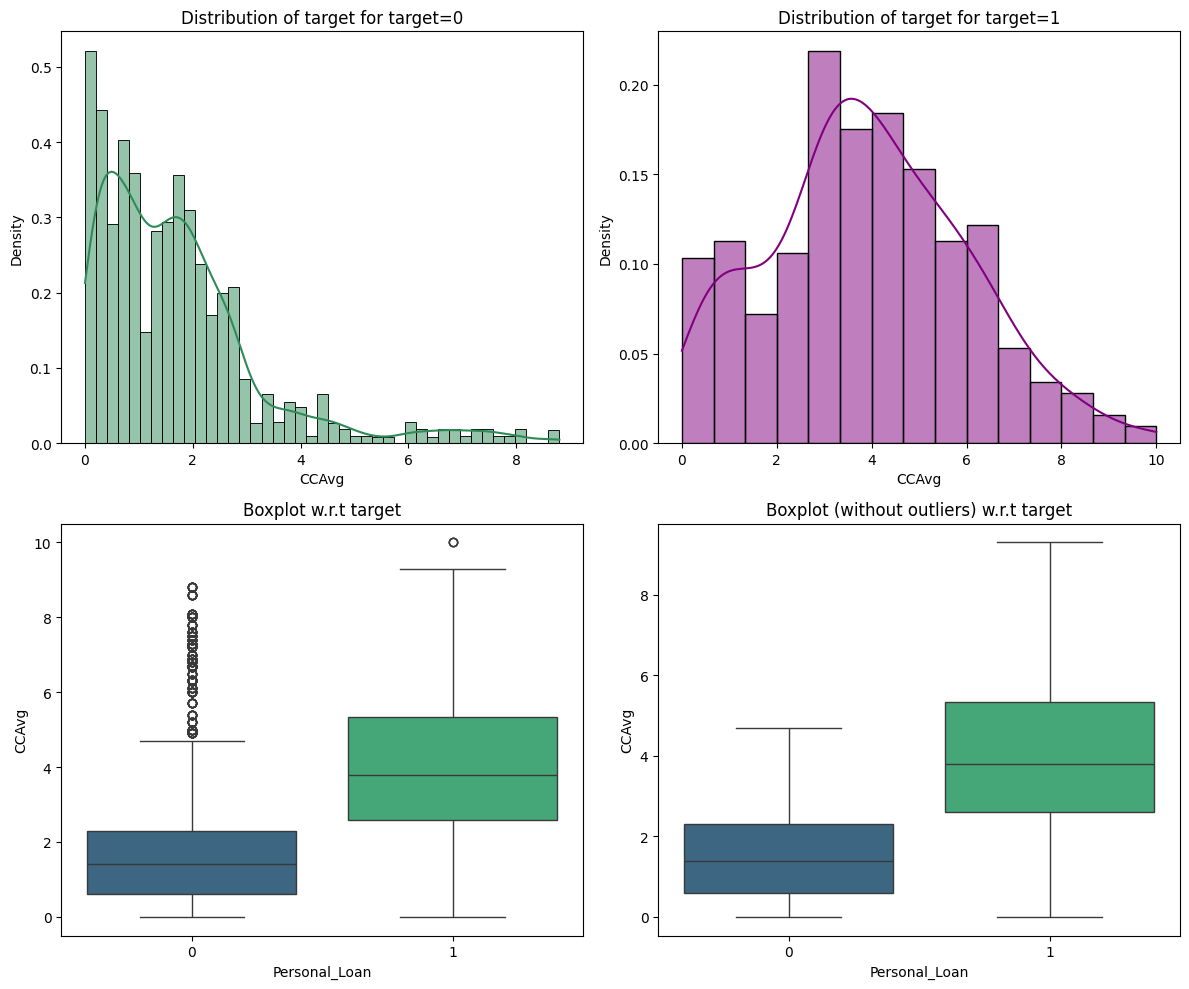

In [ ]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

CCAvg has a right skewed distribution which indicates that it plays a role in  liability of customer to buy personal loans.

## Multivariate Analysis

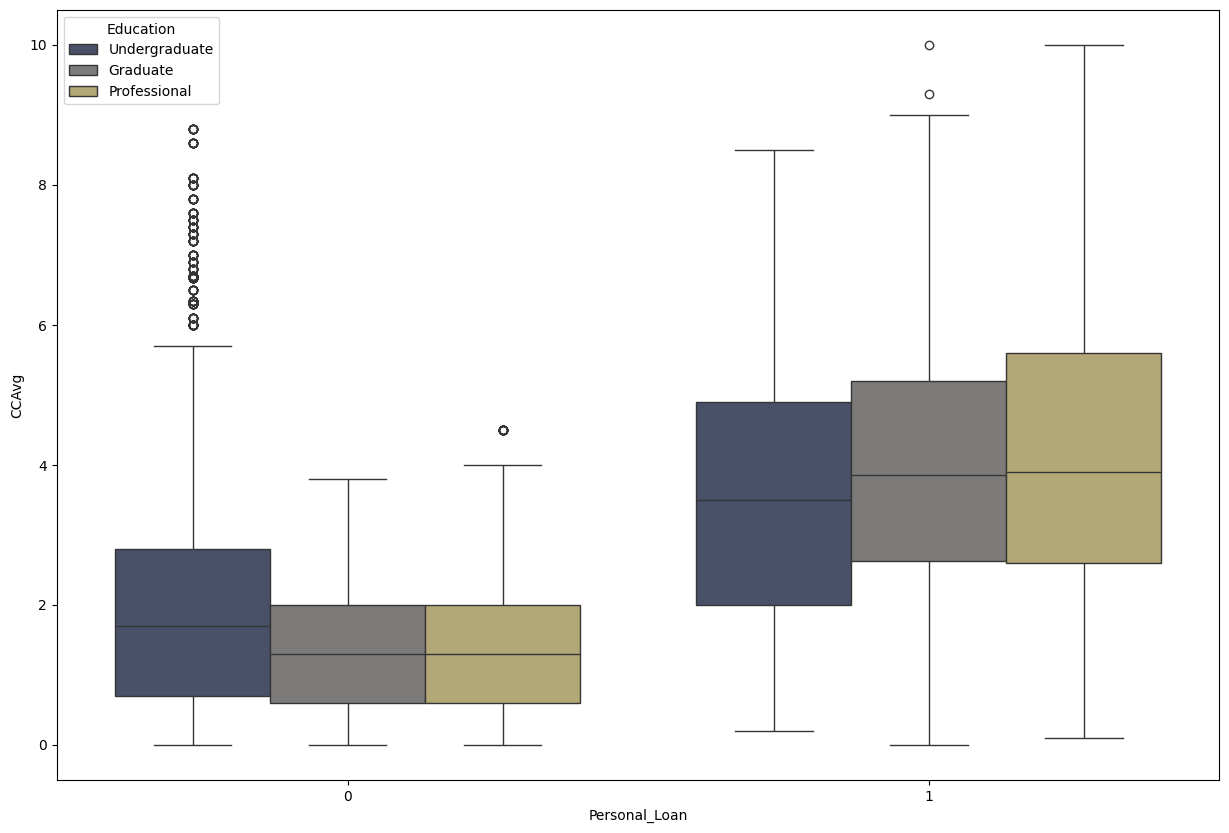

In [ ]:
fig = plt.figure(figsize=(15,10))
sns.boxplot(data=data,y= "CCAvg",x= "Personal_Loan",hue="Education",palette='cividis')
plt.show()

It has been observed that professional customers who have high average spendings on credit card are more likely to purchase personal loan.

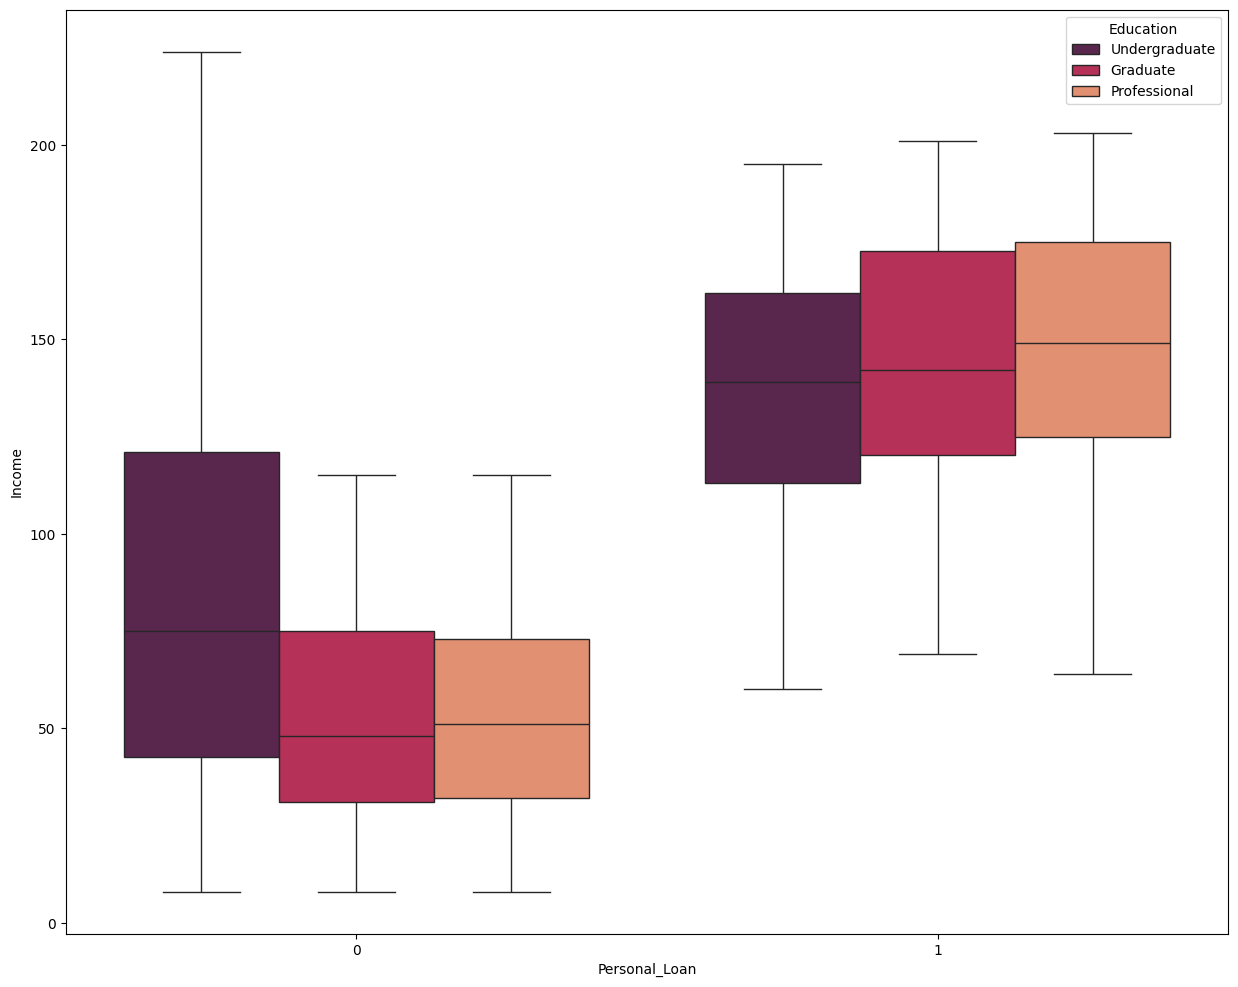

In [ ]:
fig = plt.figure(figsize=(15,12))
sns.boxplot(data=data,y= "Income",x= "Personal_Loan",hue="Education",palette='rocket')
plt.show()

It has been observed that high-income customers who are professional or graduate are more likely to purchase personal loans compared to those who are undergraduates.

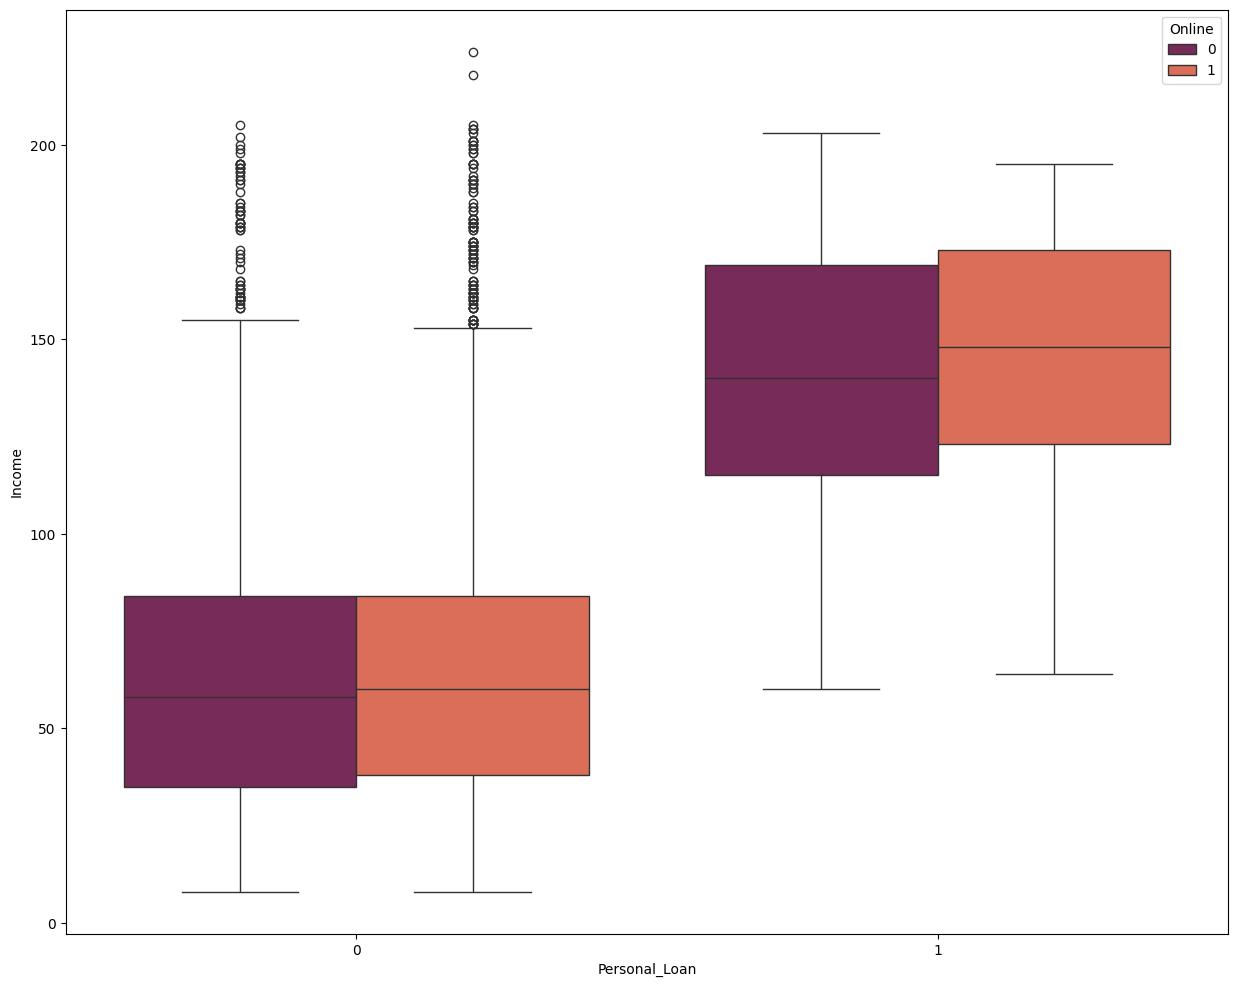

In [ ]:
fig = plt.figure(figsize=(15,12))
sns.boxplot(data=data,y= "Income",x= "Personal_Loan",hue="Online",palette='rocket')
plt.show()

It has been observed that high-income customers who use internet banking more frequently are more likely to purchase personal loans compared to those who use internet banking less frequently.

# Data Preprocessing

In [ ]:
# Reverse mapping dictionary
reverse_education_map = {
    'Undergraduate': 1,
    'Graduate': 2,
    'Professional': 3
}

# Apply reverse mapping
data['Education'] = data['Education'].map(reverse_education_map)

# Convert to categorical type
data['Education'] = data['Education'].astype('category')


In [ ]:
data['Education'].head()

,Education
0,1
1,1
2,1
3,2
4,2


## Outlier Detection

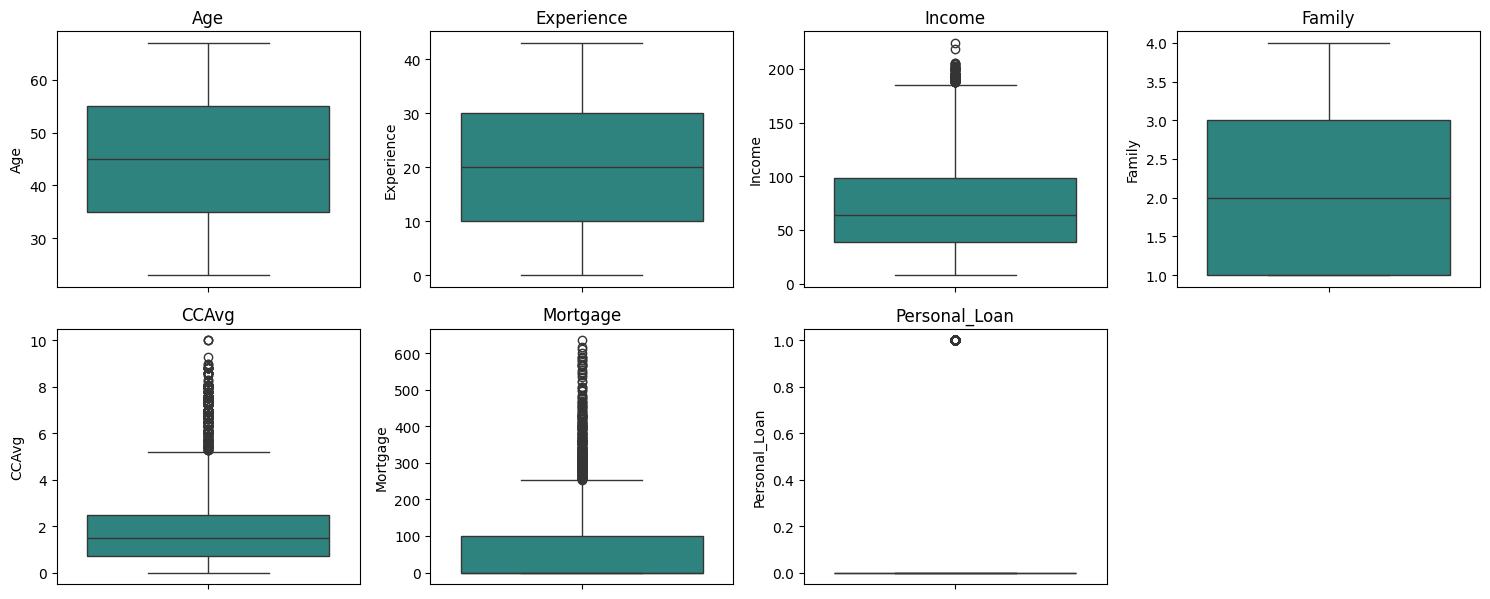

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data[variable], whis=1.5,palette="viridis")
    plt.tight_layout()
    plt.title(variable)

plt.show()

It is observed that Mortgage, CCAvg and Income coulmns are having many outliers.
However, we will not treat them as they are proper values.

# Data Preparation for Modelling

In [ ]:
# Separate features and target
X = data.drop(["Personal_Loan"], axis=1)
Y = data["Personal_Loan"]

# Exclude 'ZIPCode' from encoding
zipcode = X["ZIPCode"]  # Save ZIPCode separately
X = X.drop("ZIPCode", axis=1)  # Drop ZIPCode from X

# Apply one-hot encoding to the rest of X
X = pd.get_dummies(X, drop_first=True)

# Add ZIPCode back (if needed)
X["ZIPCode"] = zipcode

# Ensure all data is float type
X = X.astype(float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)


In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 13)
Shape of test set :  (1500, 13)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


* We had seen that around 90% of observations belongs to class 0 (Yes) and 9% observations belongs to class 1 (No), and this is preserved in the train and test sets

# Model Building

## Model Evaluation Criterion

**Model can make wrong predictions as:**
- Predicting a customer will not buy personal loan but in reality, the customer is buying the loan(FN).
- Predicting a customer will buy personal loan but in reality, customer is not buying personal loan(FP).

**Which case is more important?**

- If we predict that a customer will not buy personal loan but in reality, the the customer is buying personal loan, then the company will lose a valuable customer.
- If we predict that a customer will buy personal loan but in reality, the the customer is not buying personal loan, then the company will be wasting time in further processing the loan of that customer.
- Losing a valuable customer in this case is more vital.

**How to reduce the losses?**

The company would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# function to plot the confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree(Default)

In [ ]:
# creating an instance of the default model
model0 = DecisionTreeClassifier(random_state=1)
# Fitting the model in train set
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

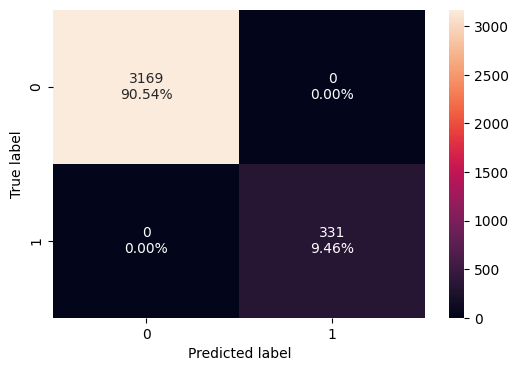

In [ ]:
# Plotting confusion matrix for train set
confusion_matrix_sklearn(model0, X_train, y_train)

In [ ]:
# Model performance calculation on train set
decision_tree_default_perf_train = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_default_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


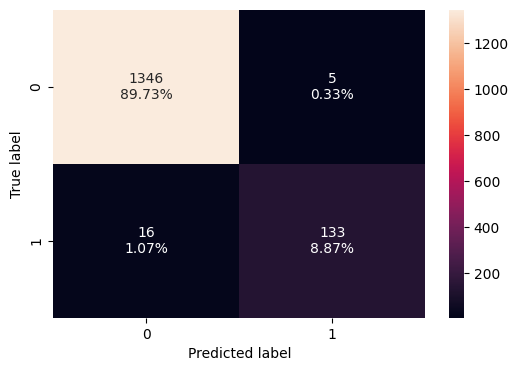

In [ ]:
# Plotting confusion matrix for test set
confusion_matrix_sklearn(model0, X_test, y_test)

In [ ]:
# Model performance calculation on test set
decision_tree_default_perf_test = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_default_perf_test

,Accuracy,Recall,Precision,F1
0,0.986,0.892617,0.963768,0.926829


## Decision Tree (with Class Weights)

* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes

* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

* class_weight is a hyperparameter for the decision tree classifier

In [ ]:
# Creating an instance of the model
model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
# Fitting the model to the training data
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

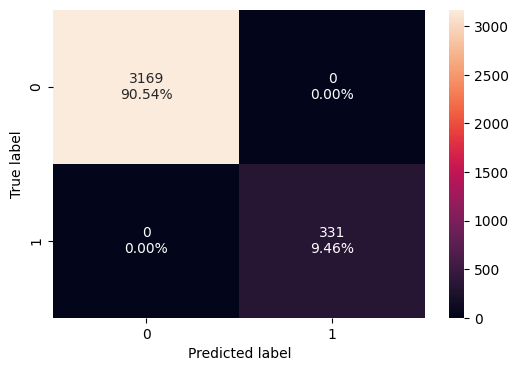

In [ ]:
# Plotting confusion matrix for train set
confusion_matrix_sklearn(model1, X_train, y_train)

In [ ]:
# Model performance calculation on train set
decision_tree_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

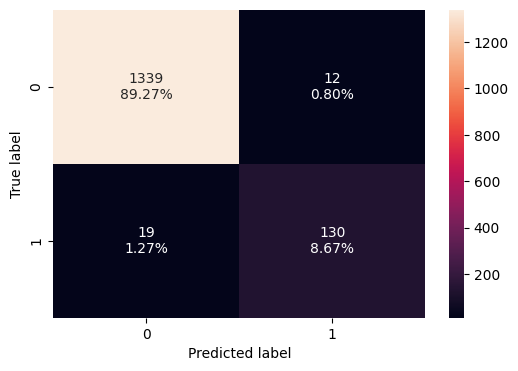

In [ ]:
# Plotting confusion matrix for test set
confusion_matrix_sklearn(model1, X_test, y_test)

In [ ]:
# Model performance calculation on test set
decision_tree_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.979333,0.872483,0.915493,0.893471


* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

**Let's use pruning techniques to try and reduce overfitting.**

### Decision Tree (Pre-pruning)

* Hyperparameter tuning is crucial because it directly affects the performance of a model.
* Unlike model parameters which are learned during training, hyperparameters need to be set before training.
* Effective hyperparameter tuning helps in improving the performance and robustness of the model.
* The below custom loop for hyperparameter tuning iterates over predefined parameter values to identify the best model based on the metric of choice (recall score).

In [ ]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0


In [ ]:
# creating an instance of the best model
model2 = best_estimator

# fitting the best model to the training data
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(2),
                       max_leaf_nodes=50, min_samples_split=10,
                       random_state=42)

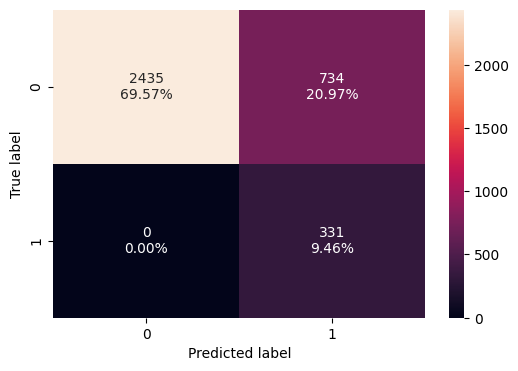

In [ ]:
# Plotting confusion matrix for test set
confusion_matrix_sklearn(model2, X_train, y_train)

In [ ]:
# Model performance calculation on train set
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model2, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


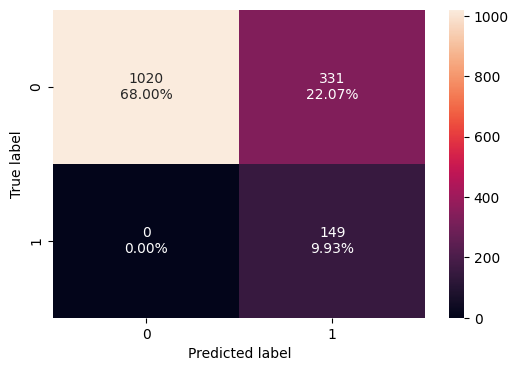

In [ ]:
# Plotting confusion matrix for test set
confusion_matrix_sklearn(model2, X_test, y_test)

In [ ]:
# Model performance calculation on test set
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model2, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.779333,1.0,0.310417,0.473768


In [ ]:
# Storing the features in a list
feature_names = list(X_train.columns)
# Calculating Importance of features in the tree building
importances = model2.feature_importances_
indices = np.argsort(importances)

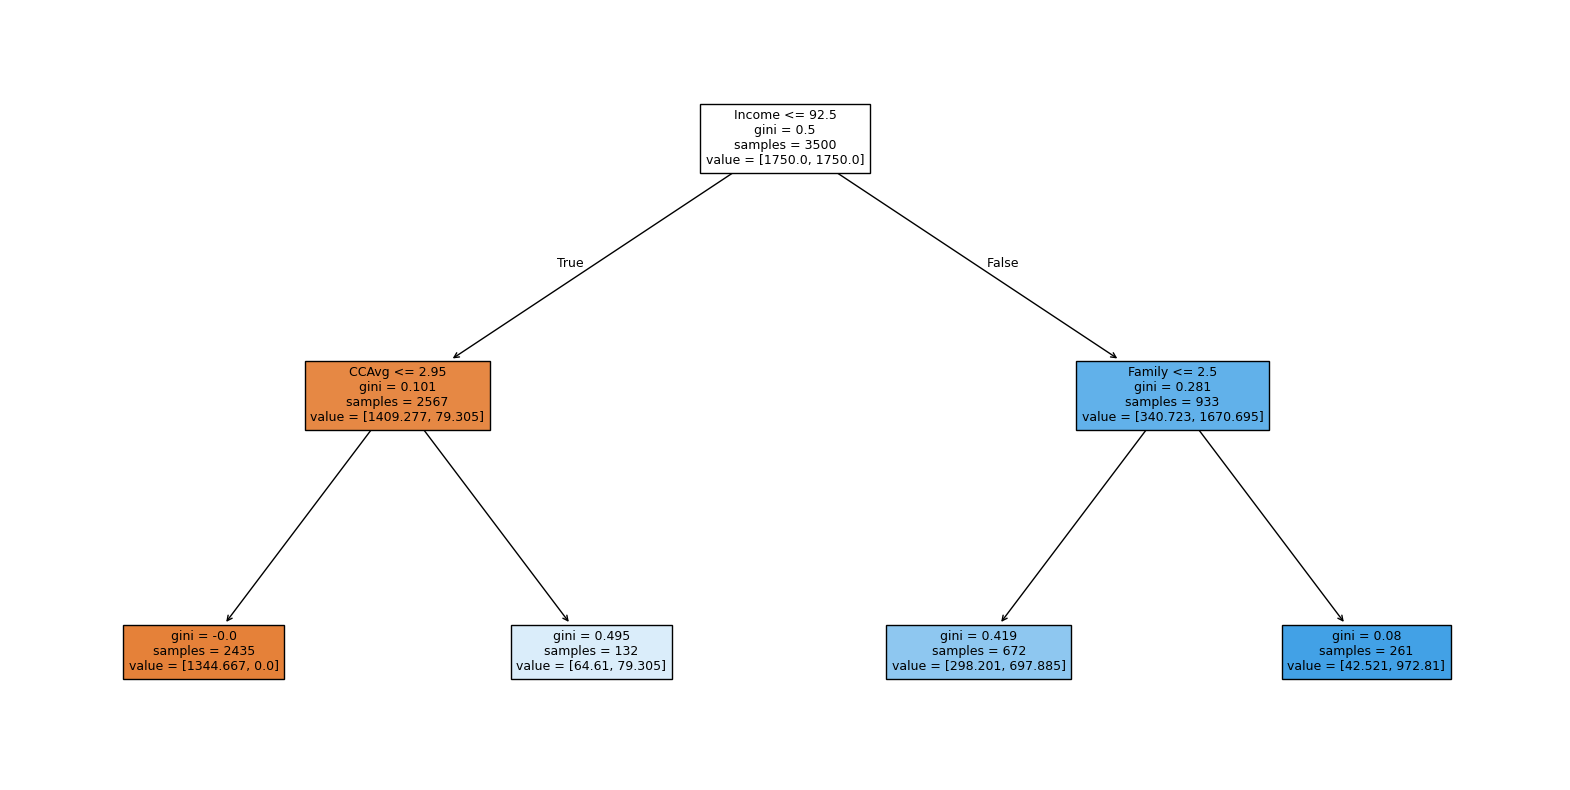

In [ ]:
# Setting the figure size
plt.figure(figsize=(20, 10))

# Plotting the decision tree
out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [ ]:
# Importance of features in the tree building
importances = model2.feature_importances_
importances

array([0.        , 0.        , 0.87652937, 0.05653065, 0.06693998,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

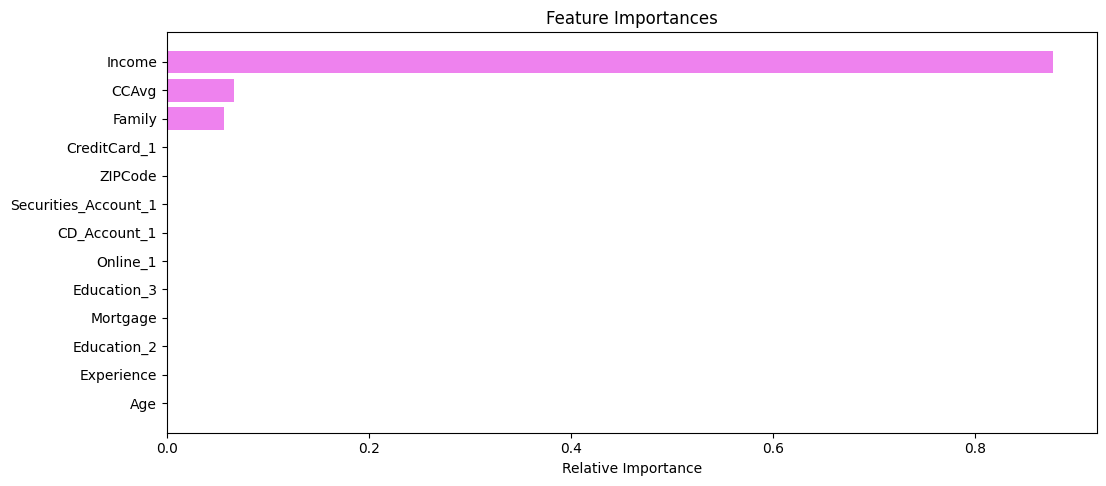

In [ ]:
# Calculate height dynamically
fig_height = 0.4 * len(indices)  # 0.4 inches per feature (adjustable)



importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, fig_height))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Decision Tree (Post pruning)

- Cost complexity pruning provides another option to control the size of a tree.
- In `DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``.
- Greater values of ``ccp_alpha`` increase the number of nodes pruned.
- Here we only show the effect of ``ccp_alpha`` on regularizing the trees and how to choose the optimal ``ccp_alpha`` value.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [ ]:
# Creating an instance of decision tree model
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
# Computing the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)
# Extracting the array of total impurities at each alpha along the pruning path
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
# Displaying the path values
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-6.516226e-15
1,3.853725e-19,-6.515840e-15
2,3.853725e-19,-6.515455e-15
3,3.853725e-19,-6.515070e-15
4,5.255079e-19,-6.514544e-15
5,1.051016e-18,-6.513493e-15
6,1.051016e-18,-6.512442e-15
7,1.257806e-17,-6.499864e-15
8,1.524700e-04,3.049400e-04
9,2.761014e-04,8.571429e-04


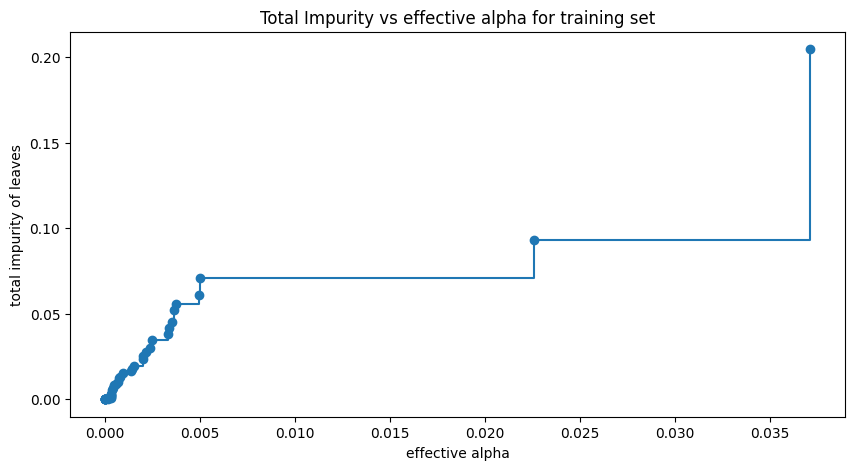

In [ ]:
# Creating a figure
fig, ax = plt.subplots(figsize=(10, 5))
# Plotting the total impurities vs effective alphas excluding the last value
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
# Setting the X-axis label
ax.set_xlabel("effective alpha")
# Setting the Y-axis label
ax.set_ylabel("total impurity of leaves")
# Setting the title of the plot
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
# Initializing an empty list to store the decision tree classifier
clfs = []
# Iterating over each ccp alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
# Printing the number of nodes in the last tree along with its ccp alpha value
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.29537927599923247


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

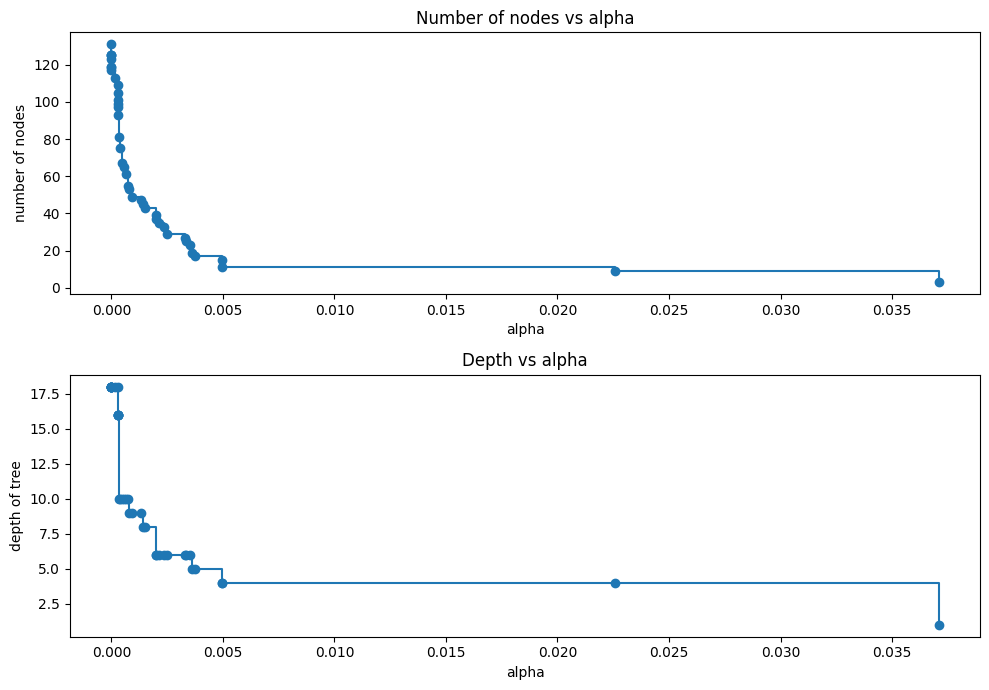

In [ ]:
# Removing the last classifier and corresponding ccp alpha value from the list
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extracting the number of nodes in each tree classifier
node_counts = [clf.tree_.node_count for clf in clfs]
# Extracting the maximum depth of each tree classifier
depth = [clf.tree_.max_depth for clf in clfs]
# Creating a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
# Plotting the number of nodes vs ccp alphas on the first subplot
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
# Plotting the depth of the tree vs ccp alpha on the second subplot
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
# Initializing empty list to store recall score for training set for each decision tree classifier
recall_train = []
# Iterating over each classifier
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
# Initializing empty list to store recall score for test set for each decision tree classifier
recall_test = []
# Iterating over each classifier
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
# Storing the train and test scores in respective lists
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

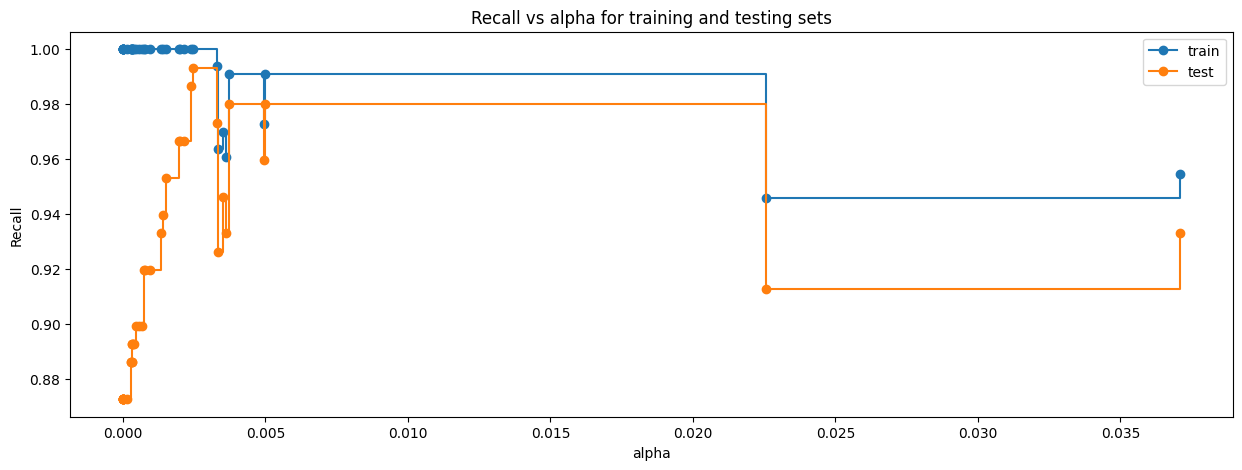

In [ ]:
# Creating a figure and a set of subplots
fig, ax = plt.subplots(figsize=(15, 5))
# Setting X and Y labels
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
# Setting title of the plot
ax.set_title("Recall vs alpha for training and testing sets")
# Plotting recall scores vs ccp alpha for train and test sets
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.002472659878642156),
                       class_weight='balanced', random_state=1)


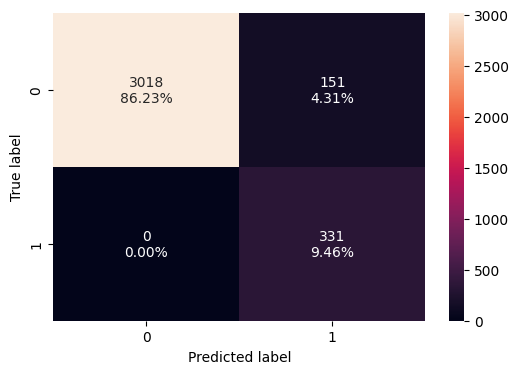

In [ ]:
# Plotting confusion matrix for train set
model4 = best_model
confusion_matrix_sklearn(model4, X_train, y_train)

In [ ]:
# Model performance calculation on train set
decision_tree_post_perf_train = model_performance_classification_sklearn(
    model4, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.956857,1.0,0.686722,0.814268


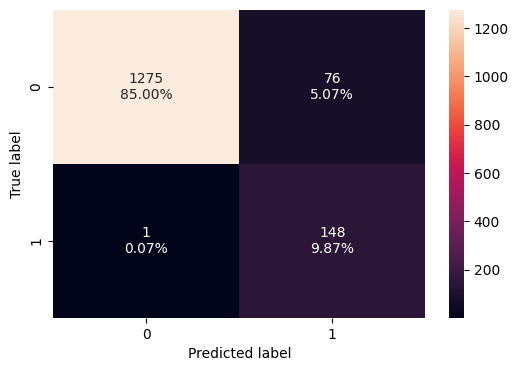

In [ ]:
# Plotting confusion matrix for test set
confusion_matrix_sklearn(model4, X_test, y_test)

In [ ]:
# Model performance calculation on test set
decision_tree_post_test = model_performance_classification_sklearn(
    model4, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.948667,0.993289,0.660714,0.793566


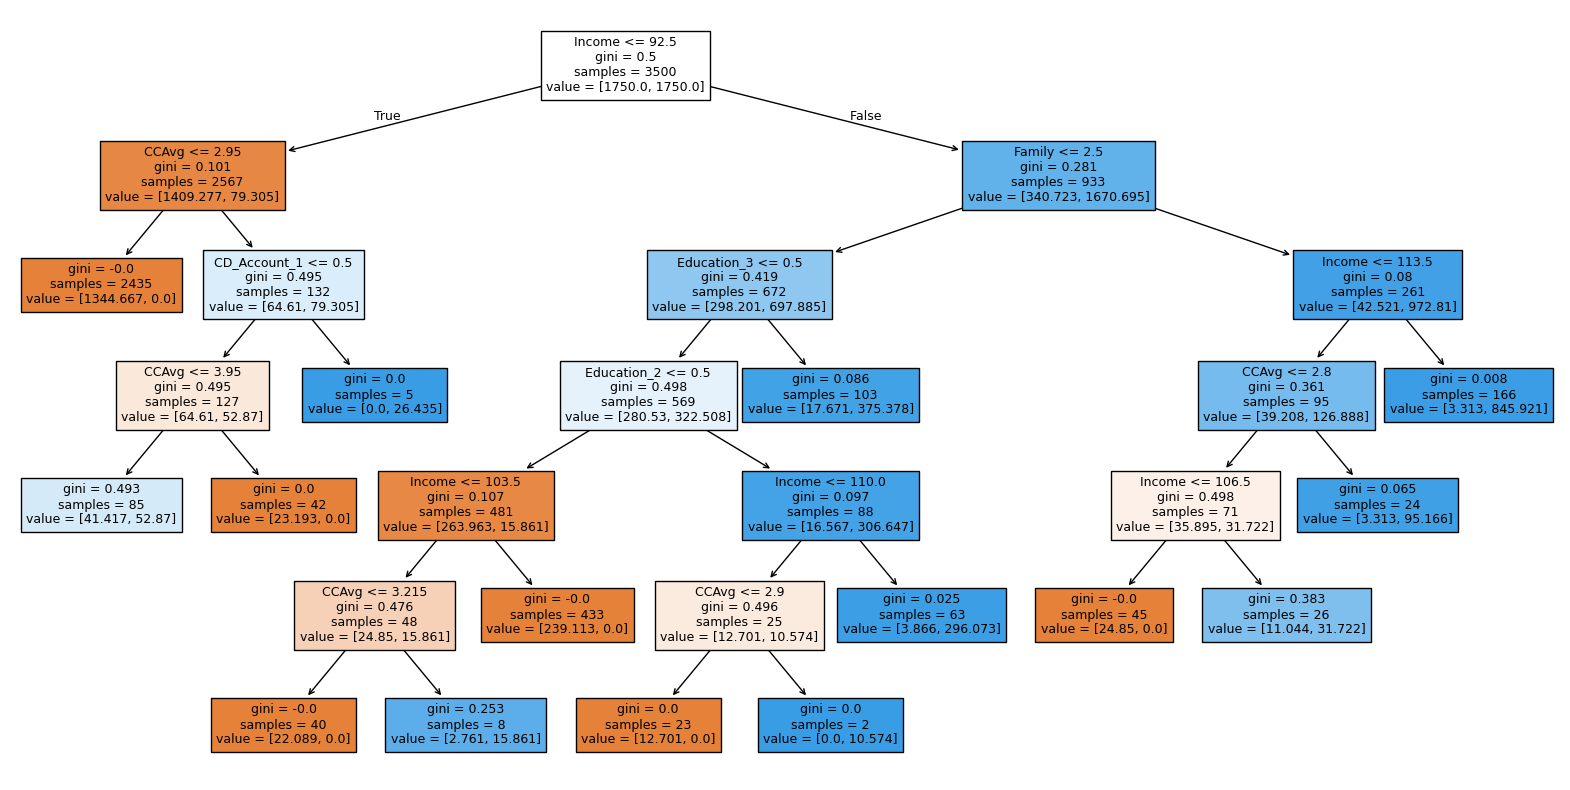

In [ ]:
# Setting the figure size
plt.figure(figsize=(20, 10))

# Plotting the decision tree

out = tree.plot_tree(
    model4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Importance of features in the tree building
importances = model4.feature_importances_
indices = np.argsort(importances)

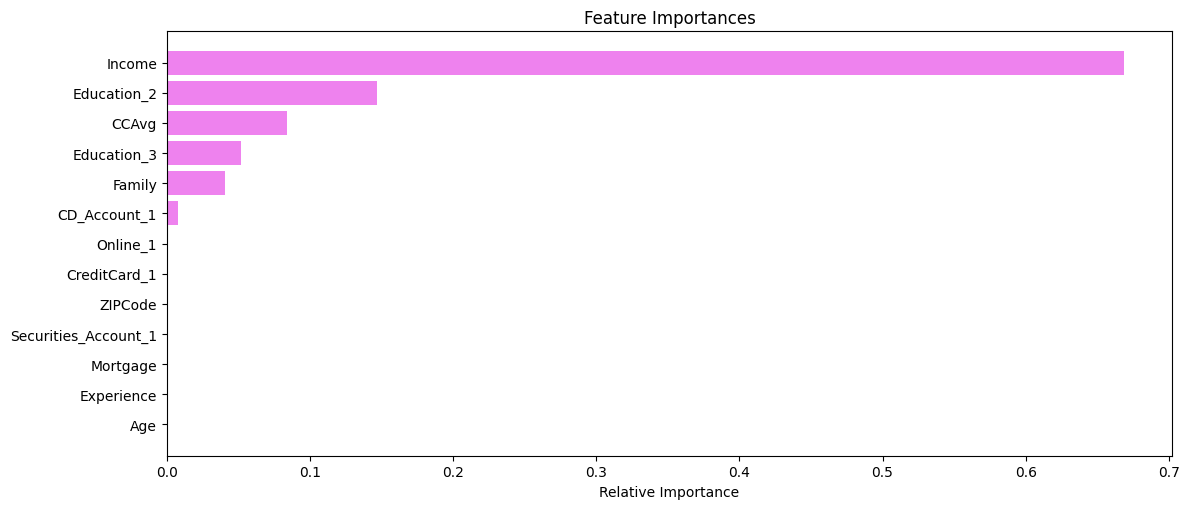

In [ ]:
# Calculate height dynamically
fig_height = 0.4 * len(indices)  # 0.4 inches per feature (adjustable)

plt.figure(figsize=(12, fig_height))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()  # Ensure everything fits
plt.show()


- Income and Graduate are the most important features for the post pruned tree

## Comparison of Models and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,1.0,0.790286,0.956857
Recall,1.0,1.0,1.000000,1.000000
Precision,1.0,1.0,0.310798,0.686722
F1,1.0,1.0,0.474212,0.814268


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.986000,0.979333,0.779333,0.948667
Recall,0.892617,0.872483,1.000000,0.993289
Precision,0.963768,0.915493,0.310417,0.660714
F1,0.926829,0.893471,0.473768,0.793566


* Decision tree models with pre-pruning is giving high recall scores on both training and test sets.
* Therefore, we are choosing the pre-pruned tree as our best model.

## Conclusions and Recommendations

* The model built can be used to predict whether a customer will buy personal loan or not.
 * The potential customers include the ones who have higher income and higher Average spending on credit card per month.
 * So, the attributes like Income and CCAvg are most significant in driving purchases.
 * Marketing Team needs to target the customers having high income and high average spendings on credit card.


 * The campaign should be planned during a festive season as that is a good time to attract more customers.
 * A separate section for high income customers can be made. High income customers can visit that section where company executives need to attend them and explain about the benefits based on income limits. For example, a customer having an income more than 55 LPA will be eligible for instant loan approval and disbursal along with very low interest rates.
 * Customers with an average income but high monthly credit card spending should also be eligible for special offers, such as cashback rewards, lower interest rates, or exclusive loan pre-approvals.

